# 1: Data Exploration and Initial Insights

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
Countrydata = pd.read_csv("/content/Countrydata.csv")

# Display the first few rows of the DataFrame
print(Countrydata.head)

<bound method NDFrame.head of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5

In [ ]:
## Missing Values Check

# Check for missing values in the DataFrame
missing_values = Countrydata.isnull().sum()

# Display the number of missing values per column
display(missing_values)

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [ ]:
from IPython.display import display

# Display the entire DataFrame or its head
display(Countrydata)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


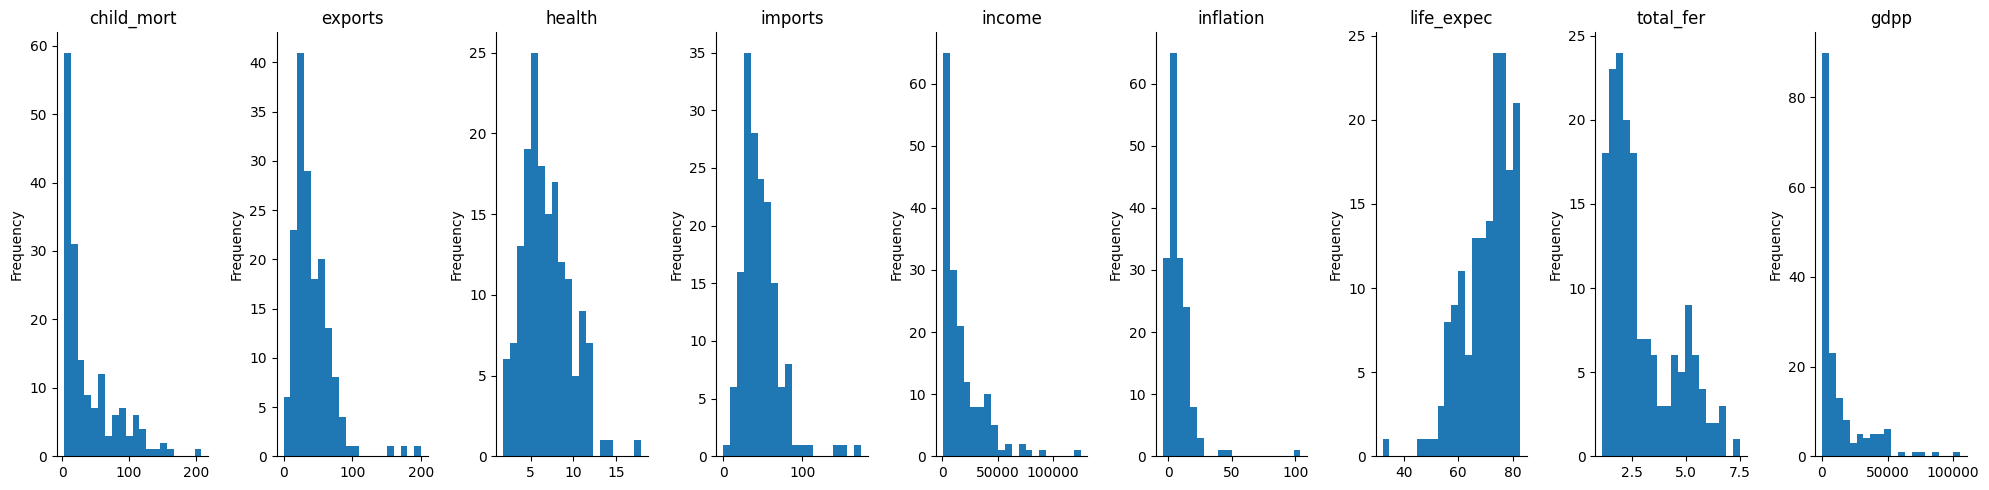

In [ ]:
### Frequency for each

from matplotlib import pyplot as plt

# Select the columns for the histograms
columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Create a figure and set of subplots (side by side)
fig, axes = plt.subplots(1, 9, figsize=(20, 5))  # 1 row, 9 columns for each feature

# Loop through the columns and plot a histogram for each feature
for i, column in enumerate(columns):
    Countrydata[column].plot(kind='hist', bins=20, ax=axes[i], title=column)  # Plot the histogram
    axes[i].spines[['top', 'right']].set_visible(False)  # Hide top and right spines for cleaner look

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

#2. Standardization and Clustering Analysis

In [ ]:
##APPLYING STANDARDIZATION TO NUMERIC

import pandas as pd
from sklearn.preprocessing import StandardScaler

Countrydata1 = pd.read_csv("/content/Countrydata.csv")

numeric_columns = Countrydata1.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", numeric_columns)

scaler = StandardScaler()

# Standardize only the numeric columns
Countrydata1[numeric_columns] = scaler.fit_transform(Countrydata1[numeric_columns])

from IPython.display import display

# Display the entire DataFrame or its head
display(Countrydata1)

Numeric columns: Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp'],
      dtype='object')


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,Argentina,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,Armenia,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
7,Australia,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,Austria,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082
9,Azerbaijan,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857


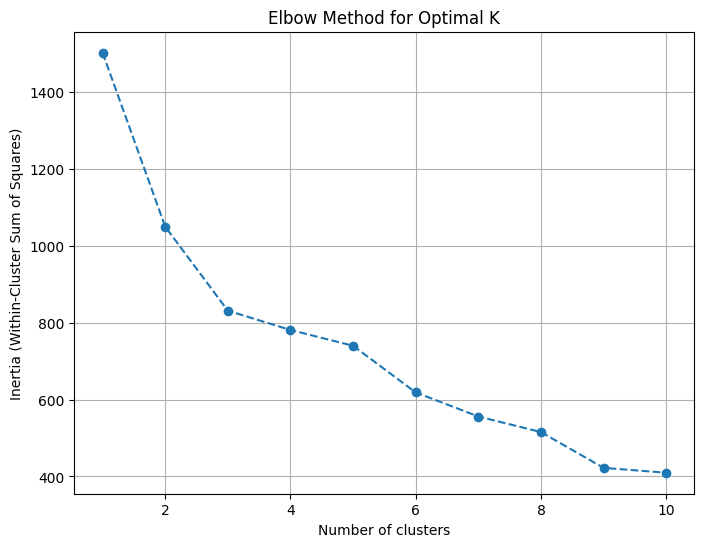

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
Countrydata1 = pd.read_csv("/content/Countrydata.csv")

# Select numeric columns
numeric_columns = Countrydata1.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numeric columns
scaler = StandardScaler()
Countrydata1[numeric_columns] = scaler.fit_transform(Countrydata1[numeric_columns])

# Perform the elbow method to find the optimal number of clusters
inertia = []  # List to store the inertia values for each k

# Loop through different values of k (1 to 10 clusters in this case)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=77)
    kmeans.fit(Countrydata1[numeric_columns])  # Fit KMeans on the standardized data
    inertia.append(kmeans.inertia_)  # Append the inertia value for each k

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
Countrydata1 = pd.read_csv("/content/Countrydata.csv")

# Select numeric columns
numeric_columns = Countrydata1.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numeric columns
scaler = StandardScaler()
Countrydata1[numeric_columns] = scaler.fit_transform(Countrydata1[numeric_columns])

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=77)
Countrydata1['Cluster'] = kmeans.fit_predict(Countrydata1[numeric_columns])

# Adjust cluster labels to start from 1 instead of 0
Countrydata1['Cluster'] = Countrydata1['Cluster'] + 1

# Create the new "country_cluster" object with the adjusted cluster labels
country_cluster = Countrydata1[['country', 'Cluster']]  # Assuming 'country' is the country name column

# Print the first few rows of the country_cluster object to verify
print(country_cluster)

                            country  Cluster
0                       Afghanistan        2
1                           Albania        1
2                           Algeria        1
3                            Angola        2
4               Antigua and Barbuda        1
5                         Argentina        1
6                           Armenia        1
7                         Australia        3
8                           Austria        3
9                        Azerbaijan        1
10                          Bahamas        1
11                          Bahrain        3
12                       Bangladesh        1
13                         Barbados        1
14                          Belarus        1
15                          Belgium        3
16                           Belize        1
17                            Benin        2
18                           Bhutan        1
19                          Bolivia        1
20           Bosnia and Herzegovina        1
21        

In [ ]:
import pandas as pd
from IPython.display import display

# Set pandas display options to show more rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Disable line wrapping
pd.set_option('display.max_colwidth', None)  # Show full content in each column

# Now print the country_cluster DataFrame
display(country_cluster)

,country,Cluster
0,Afghanistan,2
1,Albania,1
2,Algeria,1
3,Angola,2
4,Antigua and Barbuda,1
5,Argentina,1
6,Armenia,1
7,Australia,3
8,Austria,3
9,Azerbaijan,1


#3. Conducting Principal Component Analysis (PCA)

In [ ]:
## CONDUCTING PCA

from sklearn.decomposition import PCA  # Import PCA


# Step 2: Apply PCA
pca = PCA()  # Initialize PCA
pca_result = pca.fit_transform(Countrydata1[numeric_columns])  # Fit and transform the numeric data

# Create a DataFrame for the PCA results
pca_columns = [f'PC{i+1}' for i in range(pca_result.shape[1])]  # Name the principal components
Countrydata2 = pd.DataFrame(pca_result, columns=pca_columns)

# Add the non-numeric columns back to the PCA result
non_numeric_columns = Countrydata1.select_dtypes(exclude=['float64', 'int64']).columns
Countrydata2 = pd.concat([Countrydata1[non_numeric_columns].reset_index(drop=True), Countrydata2], axis=1)

# Display the PCA-transformed DataFrame
display(Countrydata2)

,country,Cluster,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,Afghanistan,2,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0.254597,-0.383000,-0.415076,0.014148
1,Albania,1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,-0.084579,-0.248919,0.221042,-0.173316
2,Algeria,1,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0.401696,0.087214,0.184162,-0.084037
3,Angola,2,-2.932423,1.695555,1.525044,0.839625,-0.273209,0.547996,0.440835,0.355998,0.091339
4,Antigua and Barbuda,1,1.033576,0.136659,-0.225721,-0.847063,-0.193007,0.206919,-0.241978,0.023681,-0.094270
5,Argentina,1,0.022407,-1.779187,0.869997,-0.036967,0.981057,0.003596,0.150832,-0.125950,-0.126079
6,Armenia,1,-0.101584,-0.568252,0.242092,-1.466266,-0.055992,-0.282469,-0.546907,0.168164,0.065629
7,Australia,3,2.342165,-1.988459,0.190344,1.105038,-0.731192,0.156455,-0.382386,0.267776,0.350631
8,Austria,3,2.973764,-0.734689,-0.519766,1.205442,0.083580,-0.099255,0.051831,0.156019,0.104369
9,Azerbaijan,1,-0.181487,-0.402866,0.867459,-0.438773,0.137350,-0.637836,0.963776,0.063190,0.035275


In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with 4 components
pca_4 = PCA(n_components=4)

# Fit PCA on the standardized data and transform it
pca_result_4 = pca_4.fit_transform(Countrydata1[numeric_columns])

# Create a new DataFrame to store the 4 principal components
pca_columns_4 = [f'PC{i+1}' for i in range(4)]  # Naming the components as PC1, PC2, PC3, PC4
Countrydata4 = pd.DataFrame(pca_result_4, columns=pca_columns_4)

# Add the non-numeric columns back to the PCA result (if needed)
non_numeric_columns = Countrydata1.select_dtypes(exclude=['float64', 'int64']).columns
Countrydata4 = pd.concat([Countrydata1[non_numeric_columns].reset_index(drop=True), Countrydata4], axis=1)

# Display the resulting DataFrame with 4 components
display(Countrydata4)

,country,Cluster,PC1,PC2,PC3,PC4
0,Afghanistan,2,-2.913025,0.095621,-0.718118,1.005255
1,Albania,1,0.429911,-0.588156,-0.333486,-1.161059
2,Algeria,1,-0.285225,-0.455174,1.221505,-0.868115
3,Angola,2,-2.932423,1.695555,1.525044,0.839625
4,Antigua and Barbuda,1,1.033576,0.136659,-0.225721,-0.847063
5,Argentina,1,0.022407,-1.779187,0.869997,-0.036967
6,Armenia,1,-0.101584,-0.568252,0.242092,-1.466266
7,Australia,3,2.342165,-1.988459,0.190344,1.105038
8,Austria,3,2.973764,-0.734689,-0.519766,1.205442
9,Azerbaijan,1,-0.181487,-0.402866,0.867459,-0.438773


In [ ]:
# Retrieve the loadings (weights) for PCA1 to PCA4
pca_loadings = pd.DataFrame(pca_4.components_.T,
                            columns=['PC1', 'PC2', 'PC3', 'PC4'],
                            index=numeric_columns)

# Display the loadings
print("PCA Loadings (Feature Contributions to Each Principal Component):")
display(pca_loadings)

PCA Loadings (Feature Contributions to Each Principal Component):


,PC1,PC2,PC3,PC4
child_mort,-0.419519,0.192884,-0.029544,0.370653
exports,0.283897,0.613163,0.144761,0.003091
health,0.150838,-0.243087,-0.596632,0.461897
imports,0.161482,0.671821,-0.299927,-0.071907
income,0.398441,0.022536,0.301548,0.392159
inflation,-0.193173,-0.008404,0.642520,0.150442
life_expec,0.425839,-0.222707,0.113919,-0.203797
total_fer,-0.403729,0.155233,0.019549,0.378304
gdpp,0.392645,-0.046022,0.122977,0.531995


#4. Clustering and Principal Component Analysis (PCA) Visualization

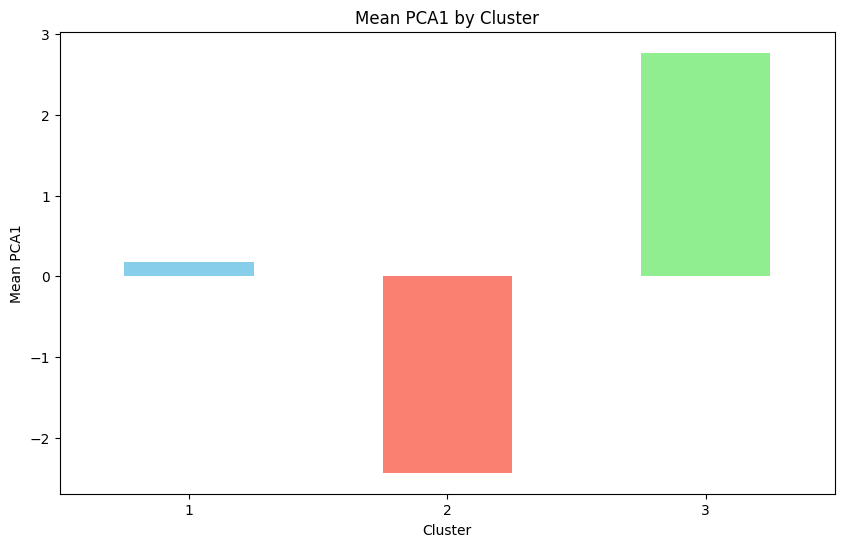

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
Countrydata1 = pd.read_csv("/content/Countrydata.csv")

# Select numeric columns
numeric_columns = Countrydata1.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numeric columns
scaler = StandardScaler()
Countrydata1[numeric_columns] = scaler.fit_transform(Countrydata1[numeric_columns])

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=77)
Countrydata1['Cluster'] = kmeans.fit_predict(Countrydata1[numeric_columns])

# Adjust cluster labels to start from 1 instead of 0
Countrydata1['Cluster'] = Countrydata1['Cluster'] + 1

# Perform PCA with 4 components
pca_4 = PCA(n_components=4)
pca_result_4 = pca_4.fit_transform(Countrydata1[numeric_columns])

# Create a new DataFrame to store the 4 principal components
pca_columns_4 = [f'PC{i+1}' for i in range(4)]  # Naming the components as PC1, PC2, PC3, PC4
Countrydata4 = pd.DataFrame(pca_result_4, columns=pca_columns_4)

# Add the non-numeric columns back to the PCA result (if needed)
non_numeric_columns = Countrydata1.select_dtypes(exclude=['float64', 'int64']).columns
Countrydata4 = pd.concat([Countrydata1[non_numeric_columns].reset_index(drop=True), Countrydata4], axis=1)

# Combine PCA and Clustering results (Add PCA components and cluster labels to original data)
Countrydata4['Cluster'] = Countrydata1['Cluster']

# Step 1: Focus on PCA1 and create bar charts for each cluster
plt.figure(figsize=(10,6))

# Group by Cluster and calculate the mean of PCA1
pca1_cluster_means = Countrydata4.groupby('Cluster')['PC1'].mean()

# Plot the bar chart for PCA1 by cluster
pca1_cluster_means.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Mean PCA1 by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean PCA1')
plt.xticks(rotation=0)
plt.show()

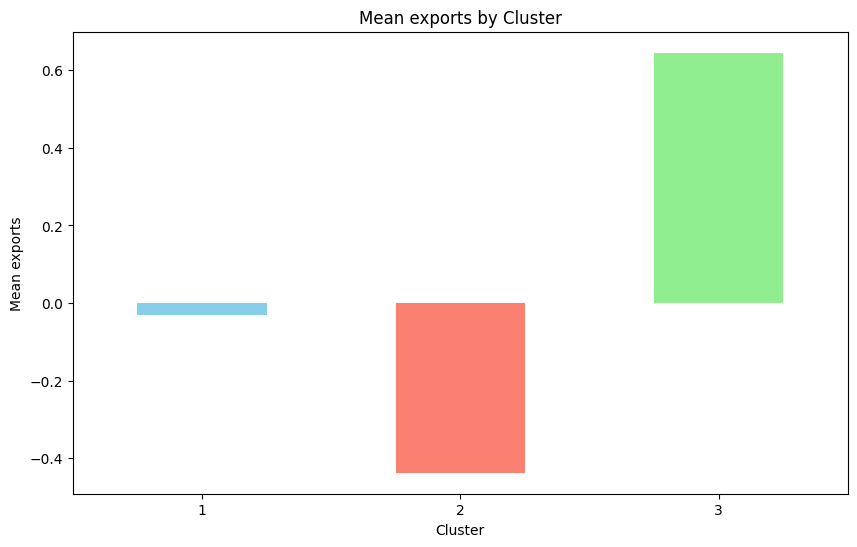

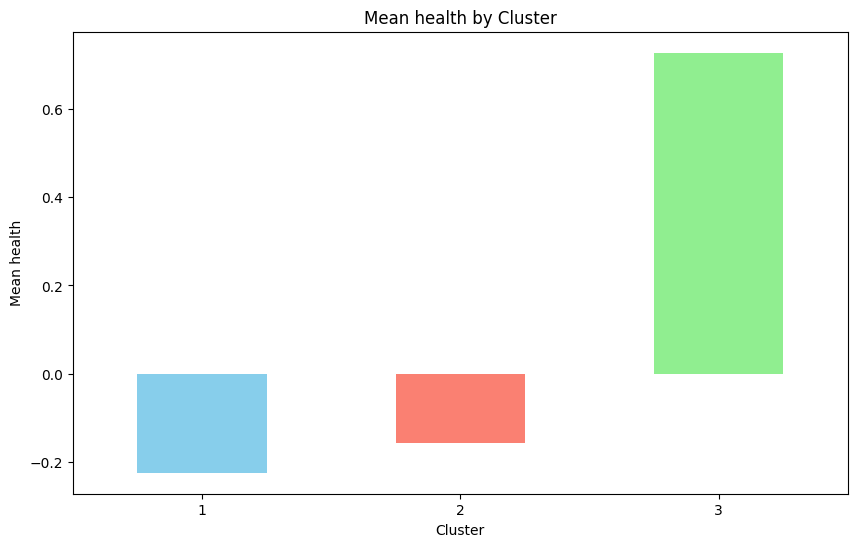

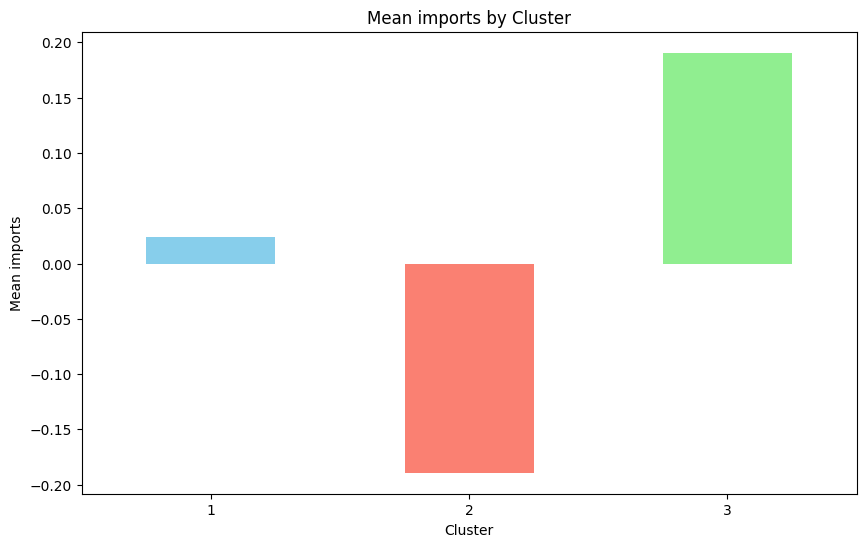

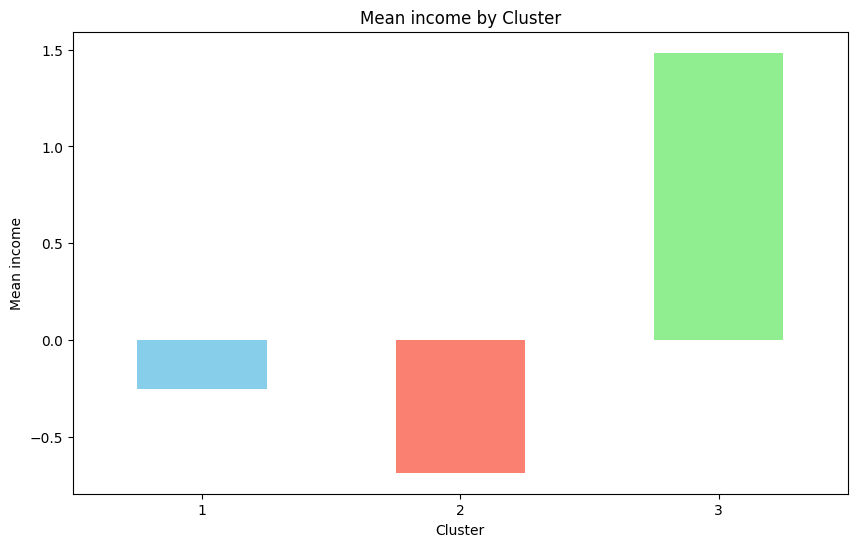

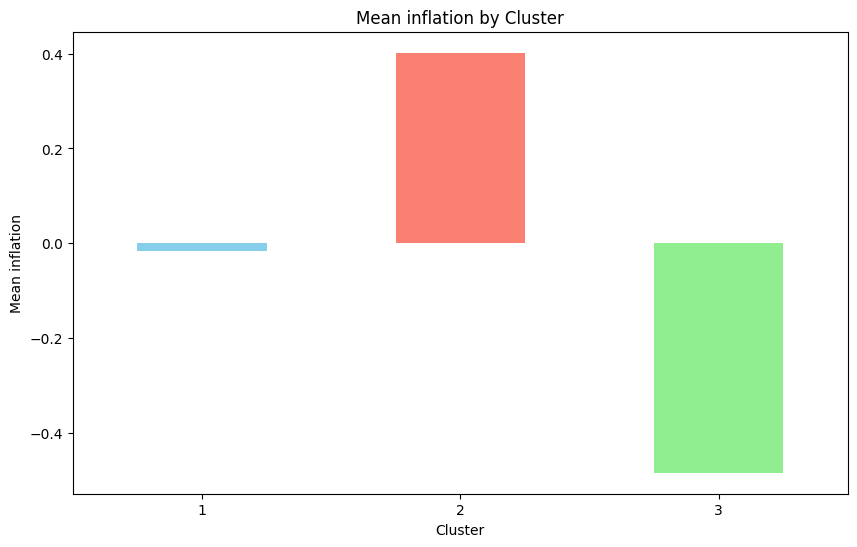

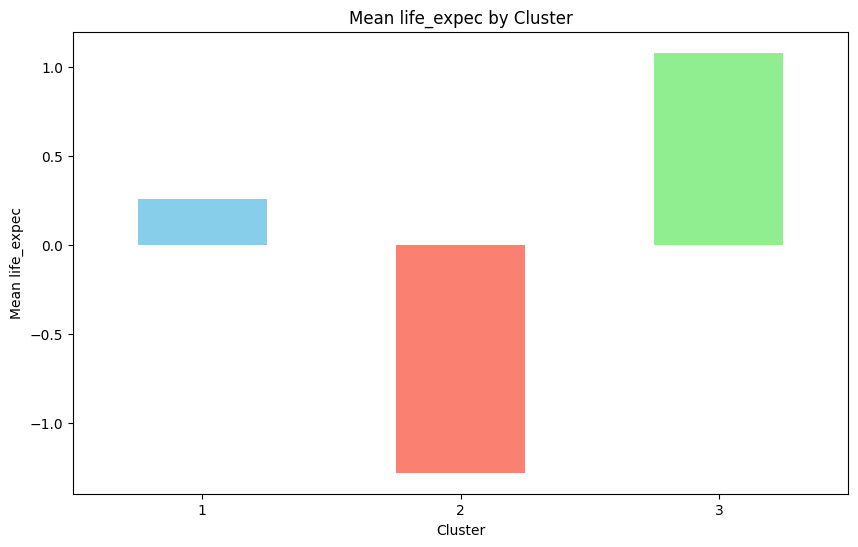

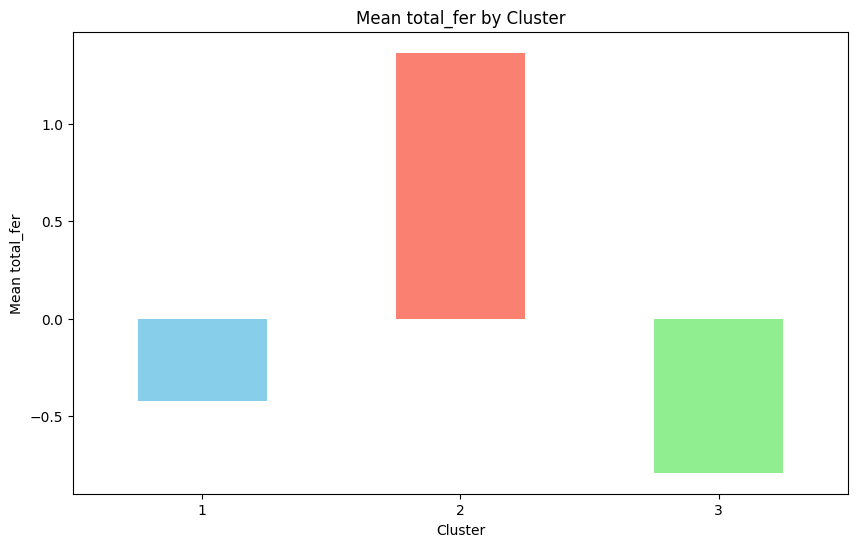

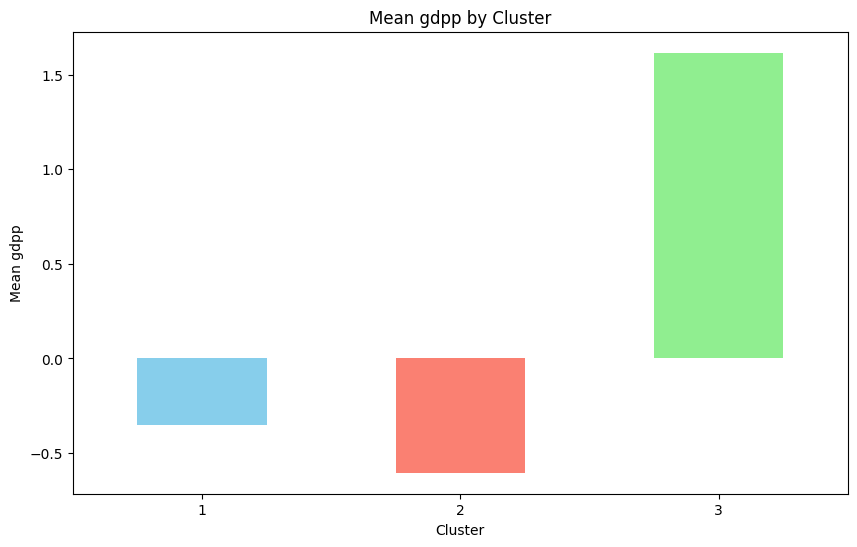

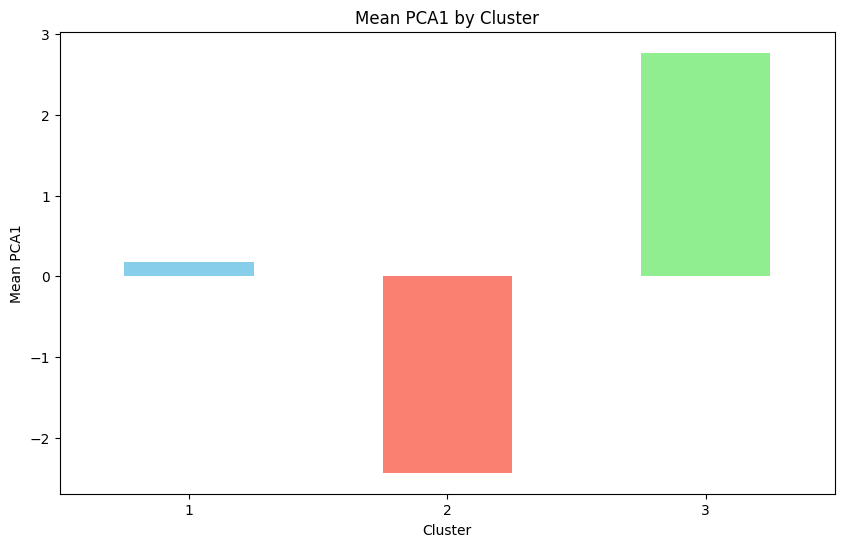

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
Countrydata1 = pd.read_csv("/content/Countrydata.csv")

# Select numeric columns
numeric_columns = Countrydata1.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numeric columns
scaler = StandardScaler()
Countrydata1[numeric_columns] = scaler.fit_transform(Countrydata1[numeric_columns])

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=77)
Countrydata1['Cluster'] = kmeans.fit_predict(Countrydata1[numeric_columns])

# Adjust cluster labels to start from 1 instead of 0
Countrydata1['Cluster'] = Countrydata1['Cluster'] + 1

# Perform PCA with 4 components
pca_4 = PCA(n_components=4)
pca_result_4 = pca_4.fit_transform(Countrydata1[numeric_columns])

# Create a new DataFrame to store the 4 principal components
pca_columns_4 = [f'PC{i+1}' for i in range(4)]  # Naming the components as PC1, PC2, PC3, PC4
Countrydata4 = pd.DataFrame(pca_result_4, columns=pca_columns_4)

# Add the non-numeric columns back to the PCA result (if needed)
non_numeric_columns = Countrydata1.select_dtypes(exclude=['float64', 'int64']).columns
Countrydata4 = pd.concat([Countrydata1[non_numeric_columns].reset_index(drop=True), Countrydata4], axis=1)

# Combine PCA and Clustering results (Add PCA components and cluster labels to original data)
Countrydata4['Cluster'] = Countrydata1['Cluster']

# Step 1: Focus on how the means of features and PCA1 differ across clusters
features = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Loop through each feature and plot the bar chart for the mean value of that feature by cluster
for feature in features:
    plt.figure(figsize=(10,6))

    # Group by Cluster and calculate the mean of the feature
    cluster_means = Countrydata1.groupby('Cluster')[feature].mean()

    # Plot the bar chart
    cluster_means.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
    plt.title(f'Mean {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {feature}')
    plt.xticks(rotation=0)
    plt.show()

# Step 2: Now, visualize how PCA1 differs across clusters
plt.figure(figsize=(10,6))

# Group by Cluster and calculate the mean of PCA1
pca1_cluster_means = Countrydata4.groupby('Cluster')['PC1'].mean()

# Plot the bar chart for PCA1 by cluster
pca1_cluster_means.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Mean PCA1 by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean PCA1')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Print the mean values for each feature by cluster
print("Mean values of features by cluster:")
for feature in features:
    cluster_means = Countrydata1.groupby('Cluster')[feature].mean()
    print(f"\n{feature} by Cluster:")
    for cluster in cluster_means.index:
        print(f"Cluster {cluster}: {cluster_means[cluster]:.4f}")

# Step 2: Print the mean values for PCA1 by cluster
print("\nMean PCA1 by Cluster:")
pca1_cluster_means = Countrydata4.groupby('Cluster')['PC1'].mean()
for cluster in pca1_cluster_means.index:
    print(f"Cluster {cluster}: {pca1_cluster_means[cluster]:.4f}")

Mean values of features by cluster:

exports by Cluster:
Cluster 1: -0.0317
Cluster 2: -0.4375
Cluster 3: 0.6451

health by Cluster:
Cluster 1: -0.2245
Cluster 2: -0.1560
Cluster 3: 0.7274

imports by Cluster:
Cluster 1: 0.0242
Cluster 2: -0.1892
Cluster 3: 0.1906

income by Cluster:
Cluster 1: -0.2518
Cluster 2: -0.6869
Cluster 3: 1.4842

inflation by Cluster:
Cluster 1: -0.0172
Cluster 2: 0.4021
Cluster 3: -0.4849

life_expec by Cluster:
Cluster 1: 0.2547
Cluster 2: -1.2822
Cluster 3: 1.0796

total_fer by Cluster:
Cluster 1: -0.4243
Cluster 2: 1.3649
Cluster 3: -0.7919

gdpp by Cluster:
Cluster 1: -0.3545
Cluster 2: -0.6042
Cluster 3: 1.6160

Mean PCA1 by Cluster:
Cluster 1: 0.1752
Cluster 2: -2.4346
Cluster 3: 2.7698


#5. Cluster Analysis Visualization: Scatter Plots of Key Indicators

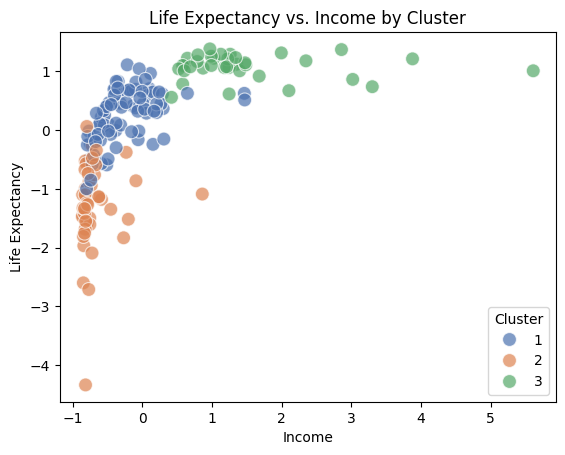

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between life_expec and income, color-coded by Cluster
sns.scatterplot(data=Countrydata1, x='income', y='life_expec', hue='Cluster', palette='deep', s=100, alpha=0.7)

# Add plot title and axis labels
plt.title('Life Expectancy vs. Income by Cluster')
plt.xlabel('Income')
plt.ylabel('Life Expectancy')
plt.legend(title='Cluster')

# Display the plot
plt.show()

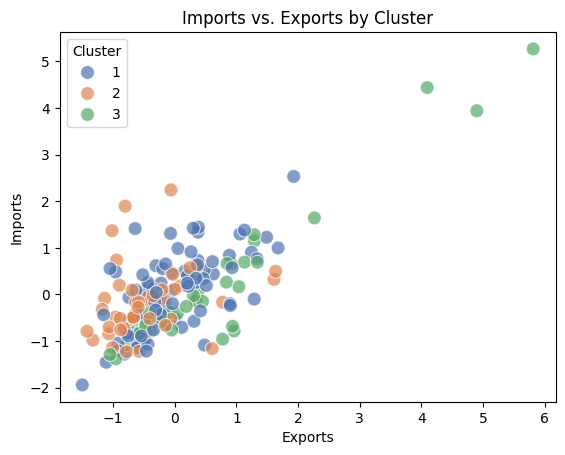

In [ ]:
# Scatter plot between imports and exports, color-coded by Cluster
sns.scatterplot(data=Countrydata1, x='exports', y='imports', hue='Cluster', palette='deep', s=100, alpha=0.7)

# Add plot title and axis labels
plt.title('Imports vs. Exports by Cluster')
plt.xlabel('Exports')
plt.ylabel('Imports')
plt.legend(title='Cluster')

# Display the plot
plt.show()

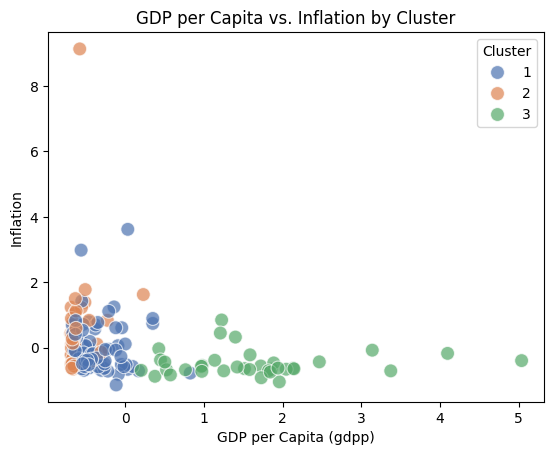

In [ ]:
# Scatter plot between gdpp and inflation, color-coded by Cluster
sns.scatterplot(data=Countrydata1, x='gdpp', y='inflation', hue='Cluster', palette='deep', s=100, alpha=0.7)

# Add plot title and axis labels
plt.title('GDP per Capita vs. Inflation by Cluster')
plt.xlabel('GDP per Capita (gdpp)')
plt.ylabel('Inflation')
plt.legend(title='Cluster')

# Display the plot
plt.show()

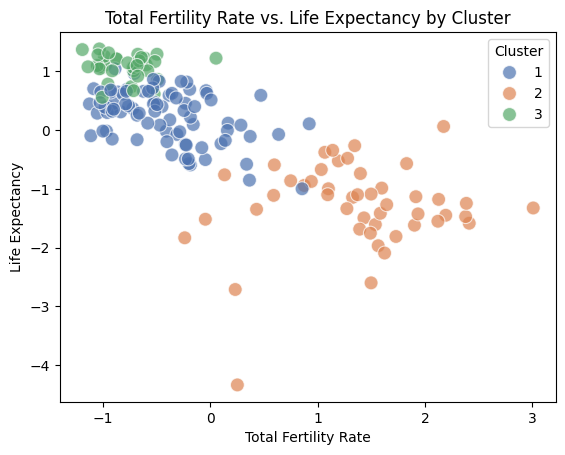

In [ ]:
# Scatter plot between total_fer and life_expec, color-coded by Cluster
sns.scatterplot(data=Countrydata1, x='total_fer', y='life_expec', hue='Cluster', palette='deep', s=100, alpha=0.7)

# Add plot title and axis labels
plt.title('Total Fertility Rate vs. Life Expectancy by Cluster')
plt.xlabel('Total Fertility Rate')
plt.ylabel('Life Expectancy')
plt.legend(title='Cluster')

# Display the plot
plt.show()

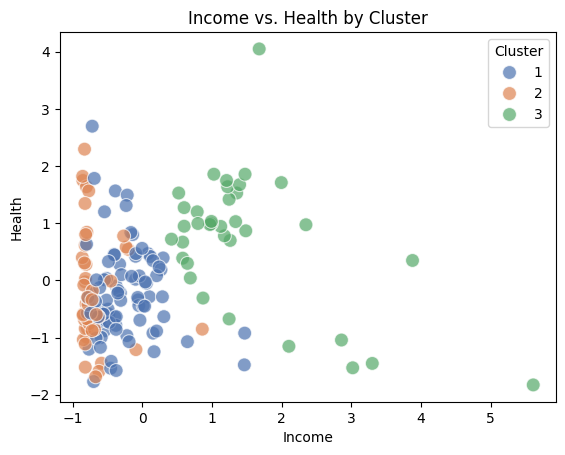

In [ ]:
# Scatter plot between income and health, color-coded by Cluster
sns.scatterplot(data=Countrydata1, x='income', y='health', hue='Cluster', palette='deep', s=100, alpha=0.7)

# Add plot title and axis labels
plt.title('Income vs. Health by Cluster')
plt.xlabel('Income')
plt.ylabel('Health')
plt.legend(title='Cluster')

# Display the plot
plt.show()

#6. Conclusion - Data Filtering and Clustering Analysis of the Chosen Cluster (Cluster 2 - underdeveloped countries with low economic and health indicators)

In [ ]:
from IPython.display import display


# Filter countries that belong to Cluster 2
cluster_2_data = Countrydata1[Countrydata1['Cluster'] == 2]

# Display the filtered data for Cluster 2
display(cluster_2_data)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,2
17,Benin,1.808842,-0.633337,-0.991634,-0.401467,-0.797319,-0.654410,-0.987502,1.598107,-0.667961,2
21,Botswana,0.353908,0.091147,0.541996,0.182698,-0.200033,0.107996,-1.517586,-0.045030,-0.361949,2
25,Burkina Faso,1.933196,-0.801651,-0.027638,-0.716337,-0.817611,-0.092213,-1.427359,1.936010,-0.677976,2
26,Burundi,1.376093,-1.177797,1.746991,-0.318607,-0.852261,0.428709,-1.449916,2.194407,-0.696801,2
28,Cameroon,1.734230,-0.691881,-0.615529,-0.824055,-0.753616,-0.557152,-1.495030,1.432468,-0.637754,2
31,Central African Republic,2.753928,-1.072418,-1.035452,-0.844770,-0.845810,-0.547664,-2.600313,1.498724,-0.685035,2
32,Chad,2.778798,-0.157666,-0.834619,-0.140457,-0.791596,-0.132065,-1.585257,2.413050,-0.660355,2
36,Comoros,1.241791,-0.900444,-0.841922,0.199270,-0.818651,-0.371177,-0.525087,1.193948,-0.667359,2


In [ ]:
from IPython.display import display
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the original dataset
Countrydata = pd.read_csv("/content/Countrydata.csv")

# Standardize the numeric columns for clustering purposes
numeric_columns = Countrydata.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

# Create a copy to avoid modifying the original data
Countrydata_scaled = Countrydata.copy()
Countrydata_scaled[numeric_columns] = scaler.fit_transform(Countrydata[numeric_columns])

# Perform KMeans clustering with 3 clusters on the standardized data
kmeans = KMeans(n_clusters=3, random_state=77)
Countrydata_scaled['Cluster'] = kmeans.fit_predict(Countrydata_scaled[numeric_columns])

# Adjust cluster labels to start from 1 instead of 0
Countrydata_scaled['Cluster'] = Countrydata_scaled['Cluster'] + 1

# Now, merge the cluster labels back with the original dataset
Countrydata['Cluster'] = Countrydata_scaled['Cluster']

# Filter countries that belong to Cluster 2
cluster_2_data = Countrydata[Countrydata['Cluster'] == 2]

# Display the original data for Cluster 2
display(cluster_2_data)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2


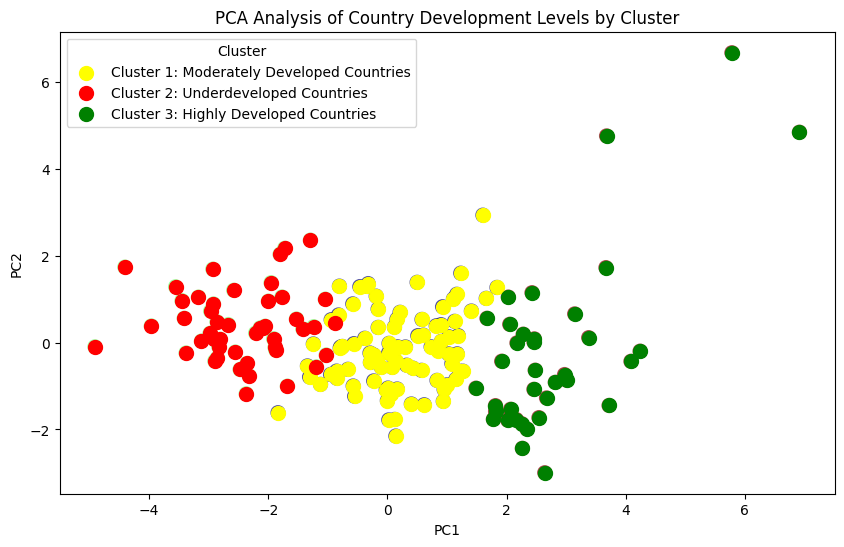

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
Countrydata1 = pd.read_csv("/content/Countrydata.csv")

# Select numeric columns
numeric_columns = Countrydata1.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numeric columns
scaler = StandardScaler()
Countrydata1[numeric_columns] = scaler.fit_transform(Countrydata1[numeric_columns])

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=77)
Countrydata1['Cluster'] = kmeans.fit_predict(Countrydata1[numeric_columns])

# Adjust cluster labels to start from 1 instead of 0
Countrydata1['Cluster'] = Countrydata1['Cluster'] + 1

# Perform PCA with 4 components
pca_4 = PCA(n_components=4)
pca_result_4 = pca_4.fit_transform(Countrydata1[numeric_columns])

# Create a new DataFrame to store the 4 principal components
pca_columns_4 = [f'PC{i+1}' for i in range(4)]  # Naming the components as PC1, PC2, PC3, PC4
Countrydata4 = pd.DataFrame(pca_result_4, columns=pca_columns_4)

# Add the non-numeric columns back to the PCA result (if needed)
non_numeric_columns = Countrydata1.select_dtypes(exclude=['float64', 'int64']).columns
Countrydata4 = pd.concat([Countrydata1[non_numeric_columns].reset_index(drop=True), Countrydata4], axis=1)

# Combine PCA and Clustering results (Add PCA components and cluster labels to original data)
Countrydata4['Cluster'] = Countrydata1['Cluster']

# Create the scatter plot for PCA1 and PCA2 with color-coded clusters
plt.figure(figsize=(10,6))
scatter = plt.scatter(Countrydata4['PC1'], Countrydata4['PC2'], c=Countrydata4['Cluster'], cmap='jet', s=100, alpha=0.6)

# Add custom labels for clusters in the plot
plt.title('PCA Analysis of Country Development Levels by Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Set custom colors for clusters and corresponding labels
cluster_colors = {1: 'yellow', 2: 'red', 3: 'green'}
cluster_labels = {1: 'Moderately Developed Countries', 2: 'Underdeveloped Countries', 3: 'Highly Developed Countries'}

# Loop through each cluster and plot it with custom colors
for cluster, color in cluster_colors.items():
    cluster_data = Countrydata4[Countrydata4['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], color=color, label=f'Cluster {cluster}: {cluster_labels[cluster]}', s=100)

# Display the plot
plt.legend(title='Cluster', loc='best')
plt.show()